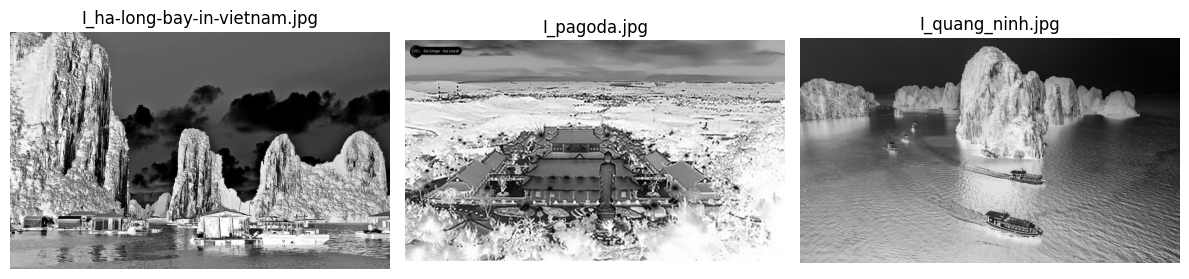

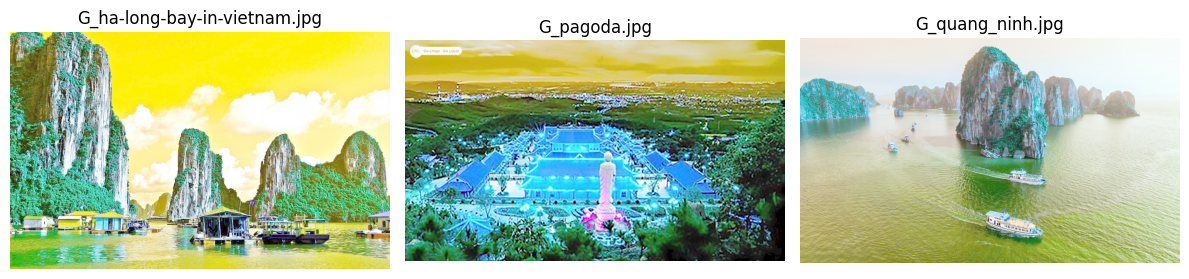

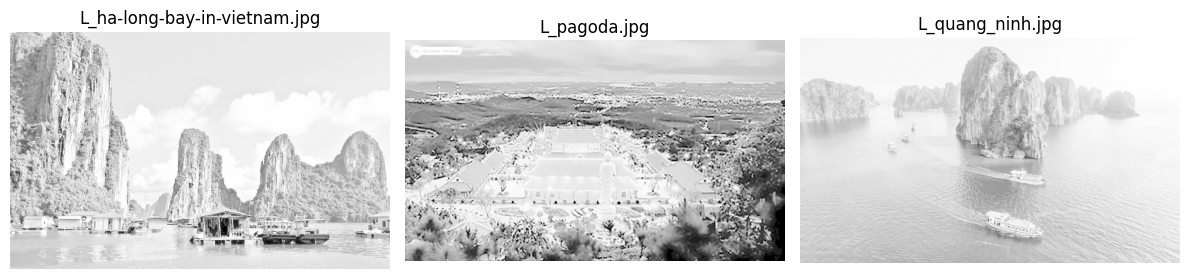

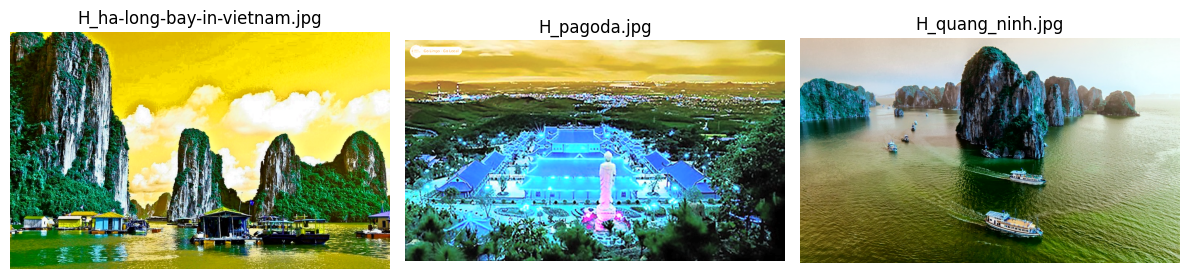

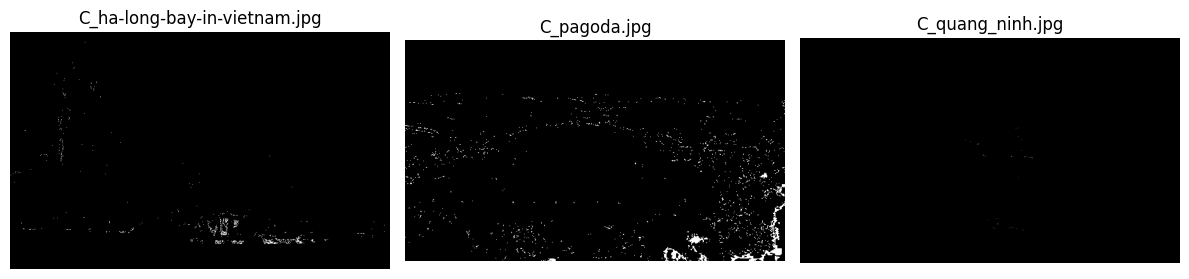

In [ ]:
# Câu 1:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

os.makedirs("output", exist_ok=True)

def inverse(img): return 255 - img

def gamma(img): 
    table = np.array([((i / 255) ** (1/2.2)) * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(img, table)

def log(img): 
    img = img.astype(np.float32) + 1
    result = np.log(img)
    return cv2.normalize(result, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

def hist(img): 
    if len(img.shape) == 2:
        return cv2.equalizeHist(img)
    else:
        ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
        ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
        return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

def contrast(img): 
    return ((img - img.min()) * 255 / (img.max() - img.min())).astype(np.uint8)

funcs = {'I': inverse, 'G': gamma, 'L': log, 'H': hist, 'C': contrast}

while True:
    key = input("Nhập I/G/L/H/C hoặc Q để thoát: ").upper()
    if key == 'Q': break
    if key not in funcs:
        print("Phím không hợp lệ.")
        continue

    images = []
    names = []

    for f in os.listdir("exercise"):
        img_path = os.path.join("exercise", f)
        img = cv2.imread(img_path)
        if img is None: continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if key in ['L', 'C', 'I'] else img
        out = funcs[key](gray)

        cv2.imwrite(f"output/{key}_{f}", out)
        images.append(out)
        names.append(f)

    # Hiển thị ảnh theo lưới
    cols = 3
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=(12, 4 * rows))
    for i, img in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        cmap = 'gray' if len(img.shape) == 2 else None
        plt.imshow(img, cmap=cmap)
        plt.title(f"{key}_{names[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


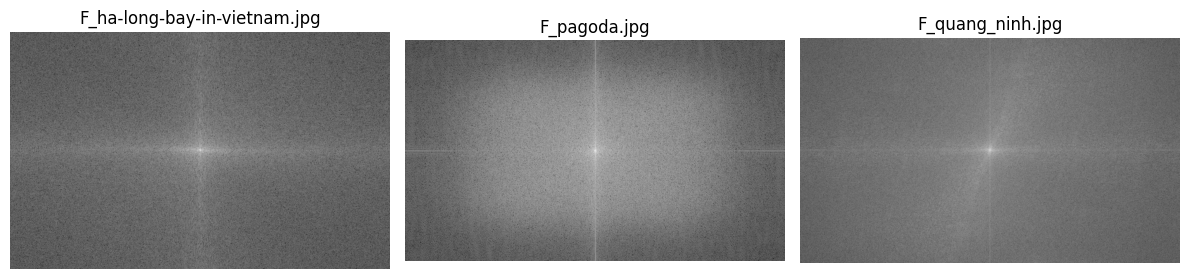

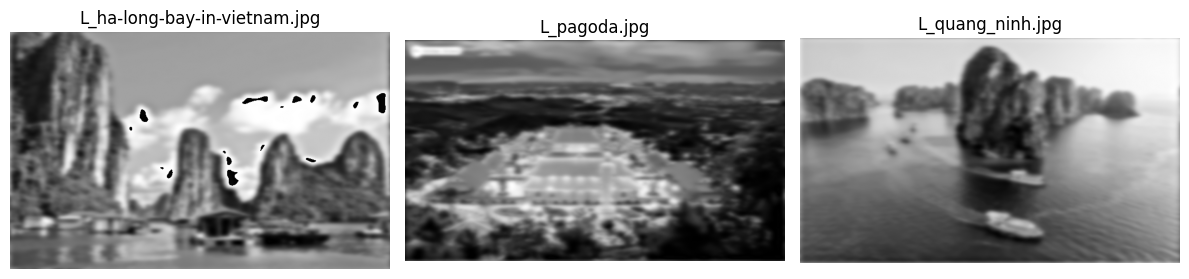

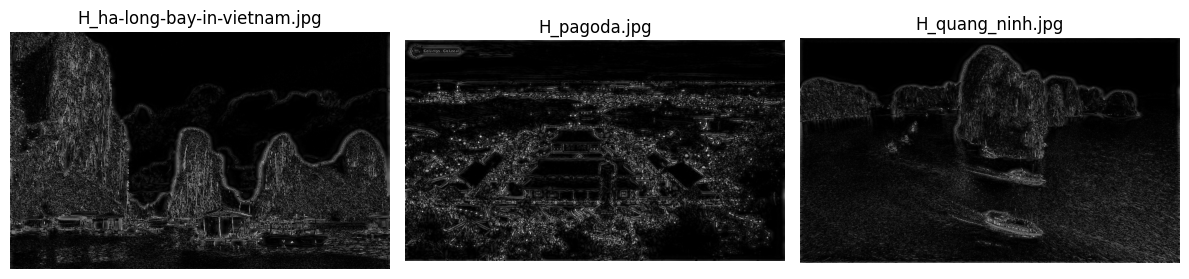

In [4]:
# Câu 2 
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

os.makedirs("output", exist_ok=True)

def fft_magnitude(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    mag = 20 * np.log(np.abs(fshift) + 1)
    return cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

def butterworth_filter(img, d0=30, n=2, type='low'):
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2

    u = np.arange(rows)
    v = np.arange(cols)
    u, v = np.meshgrid(u - crow, v - ccol, indexing='ij')
    d = np.sqrt(u**2 + v**2)

    if type == 'low':
        H = 1 / (1 + (d / d0) ** (2 * n))
    else:  # highpass
        H = 1 / (1 + (d0 / (d + 1e-5)) ** (2 * n))

    F = np.fft.fft2(img)
    Fshift = np.fft.fftshift(F)
    G = Fshift * H
    G = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(G)
    return np.abs(img_back).astype(np.uint8)

funcs = {
    'F': lambda img: fft_magnitude(img),
    'L': lambda img: butterworth_filter(img, type='low'),
    'H': lambda img: butterworth_filter(img, type='high')
}

while True:
    key = input("Nhập F (FFT), L (Lowpass), H (Highpass), Q (Thoát): ").upper()
    if key == 'Q': break
    if key not in funcs:
        print("Phím không hợp lệ.")
        continue

    images = []
    names = []

    for f in os.listdir("exercise"):
        path = os.path.join("exercise", f)
        img = cv2.imread(path, 0)  # đọc grayscale
        if img is None: continue

        result = funcs[key](img)
        cv2.imwrite(f"output/{key}_{f}", result)
        images.append(result)
        names.append(f"{key}_{f}")

    cols = 3
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=(12, 4 * rows))
    for i, img in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(names[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()


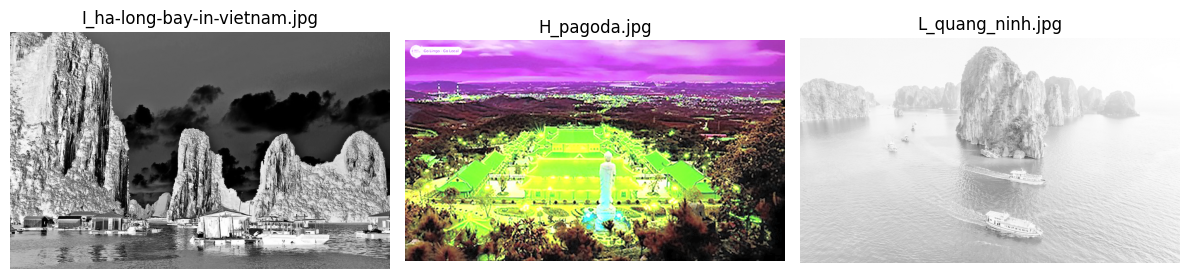

In [5]:
# Câu 3:
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt

os.makedirs("output", exist_ok=True)

# Các hàm biến đổi trong câu 1
def inverse(img): return 255 - img

def gamma(img): 
    table = np.array([((i / 255) ** (1/2.2)) * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(img, table)

def log(img): 
    img = img.astype(np.float32) + 1
    result = np.log(img)
    return cv2.normalize(result, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

def hist(img): 
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
    return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

def contrast(img): 
    return ((img - img.min()) * 255 / (img.max() - img.min())).astype(np.uint8)

# Danh sách hàm và tên tương ứng
transformations = [
    ('I', inverse),
    ('G', gamma),
    ('L', log),
    ('H', hist),
    ('C', contrast)
]

images = []
names = []

for f in os.listdir("exercise"):
    path = os.path.join("exercise", f)
    img = cv2.imread(path)
    if img is None: continue

    # Đổi thứ tự màu RGB ngẫu nhiên
    channels = [0, 1, 2]
    random.shuffle(channels)
    img_rgb = img[:, :, channels]

    # Chọn ngẫu nhiên một phép biến đổi
    key, func = random.choice(transformations)

    # Nếu là hàm cần ảnh xám → chuyển đổi
    if key in ['I', 'G', 'L', 'C']:
        gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
        out = func(gray)
    else:
        out = func(img_rgb)

    out_path = f"output/{key}_{f}"
    cv2.imwrite(out_path, out)
    images.append(out)
    names.append(f"{key}_{f}")

# Hiển thị ảnh
cols = 3
rows = (len(images) + cols - 1) // cols
plt.figure(figsize=(12, 4 * rows))
for i, img in enumerate(images):
    plt.subplot(rows, cols, i + 1)
    cmap = 'gray' if len(img.shape) == 2 else None
    plt.imshow(img, cmap=cmap)
    plt.title(names[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


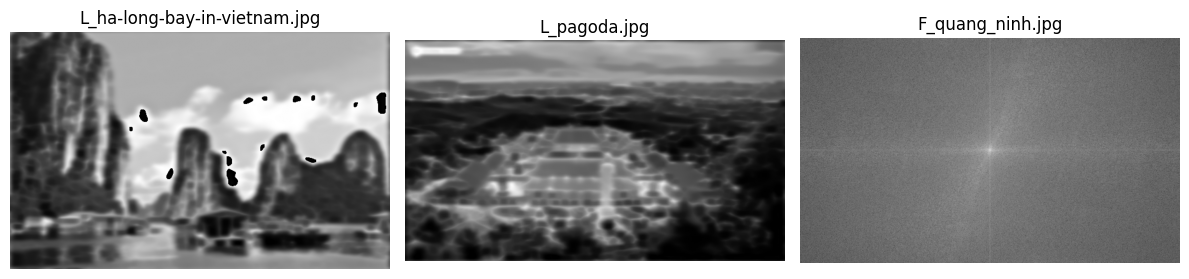

In [7]:
# Câu 4:
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt

os.makedirs("output", exist_ok=True)

# Biến đổi Fourier
def fft_magnitude(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    mag = 20 * np.log(np.abs(fshift) + 1)
    return cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Bộ lọc Butterworth
def butterworth(img, d0=30, n=2, type='low'):
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    u, v = np.meshgrid(np.arange(rows) - crow, np.arange(cols) - ccol, indexing='ij')
    d = np.sqrt(u**2 + v**2)
    if type == 'low':
        H = 1 / (1 + (d / d0) ** (2 * n))
    else:
        H = 1 / (1 + (d0 / (d + 1e-5)) ** (2 * n))
    F = np.fft.fft2(img)
    Fshift = np.fft.fftshift(F)
    G = Fshift * H
    G = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(G)
    return np.abs(img_back).astype(np.uint8)

# Bộ lọc Min / Max
def min_filter(img): return cv2.erode(img, np.ones((3, 3), np.uint8))
def max_filter(img): return cv2.dilate(img, np.ones((3, 3), np.uint8))

# Danh sách hàm biến đổi
transformations = [
    ('F', lambda img: fft_magnitude(img)),
    ('L', lambda img: min_filter(butterworth(img, type='low'))),
    ('H', lambda img: max_filter(butterworth(img, type='high')))
]

images = []
names = []

for f in os.listdir("exercise"):
    path = os.path.join("exercise", f)
    img = cv2.imread(path)
    if img is None: continue

    # Đổi thứ tự màu RGB ngẫu nhiên
    channels = [0, 1, 2]
    random.shuffle(channels)
    img_rgb = img[:, :, channels]

    gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

    key, func = random.choice(transformations)
    result = func(gray)

    out_path = f"output/{key}_{f}"
    cv2.imwrite(out_path, result)
    images.append(result)
    names.append(f"{key}_{f}")

# Hiển thị ảnh
cols = 3
rows = (len(images) + cols - 1) // cols
plt.figure(figsize=(12, 4 * rows))
for i, img in enumerate(images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(names[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
